## Hyper Parameter Tuning

- Hyper Parameter Tuning is the process of finding the best parameters for your machine learning models.
- It is surprisingly easy to do and utilizes a for loop
- If you have a classification problem in a technical assessment for a job (people in the cohort have already had to do this!), and you use hyper parameter tuning, you will look like a machine learning genius to recruiters!

In [31]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

For this problem we will be using the iris dataset.

In [32]:
#Dataset
iris_df = pd.read_csv('Data/iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Since this dataset is already cleaned and prepared for analysis, we can move onto the hyperparameter tuning.

Before we start, the classifier that I will be using is RandomForestClassifier. This classifier creates a certain amount of decision trees and runs them all on the records in the dataset. It then votes and takes the majority classification from all the trees. 

The problem we are trying to solve is what is the best amount of trees to use for this dataset?

In [33]:
X = iris_df.drop(columns=['species'])
y = iris_df['species']

#Hyperparameter Tuning
scores = [] #Create an empty list to store the cv_score for each classifier

#A general convention is that the maximum amount of trees should not
#exceed the square root of the amount of rows in the dataset
#since this dataset has 150 rows, the maximum amount of trees 
#we are going to go to is 12

for i in range(12): 
    rf = RandomForestClassifier(n_estimators=i+1, criterion='entropy', random_state=42)

    #This gets the accuracy scores for the classifier
    cv_score = cross_val_score(rf, X, y, scoring='accuracy', cv=5) 

    #Take the mean score from the accuracy scores and append to scores
    mean_score = np.mean(cv_score)
    scores.append(mean_score)

best_trees = np.argmax(scores) + 1 #Gets the amount of trees that corresponds to the highest accuracy
print(f'For the iris dataset we should use {best_trees} tree(s)')

For the iris dataset we should use 3 tree(s)


Now that we have our best parameter, we can create a model that uses it.

In [34]:
optimized_rf = RandomForestClassifier(n_estimators=best_trees, criterion='entropy', random_state=42)

#Make predictions
pred = cross_val_predict(optimized_rf, X, y, cv=5)

#Get accuracy score by comparing the predictions to y
print(f'The accuracy of the optimized model is {accuracy_score(y, pred)}')

The accuracy of the optimized model is 0.96


Confusion Matrix Using Seaborn

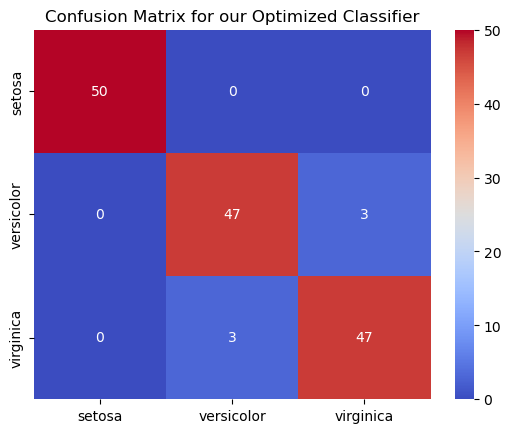

In [35]:
confusion_matrix = confusion_matrix(y, pred)

labels = ['setosa', 'versicolor', 'virginica']

heatmap = sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', xticklabels=labels, 
                      yticklabels=labels)
plt.title('Confusion Matrix for our Optimized Classifier')
plt.show()

This method can be used in every model that has an accuracy or error metric and has customizable parameters!